<a href="https://colab.research.google.com/github/LakshmanPalli/Heart-Stroke-Prediction/blob/main/ML_Group_Assignment_Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the neccessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [ ]:
# additional library configurations
pd.options.mode.copy_on_write = True # Allow re-write on variable
sns.set_style('darkgrid') # Seaborn style
warnings.filterwarnings('ignore') # Ignore warnings
pd.set_option('display.max_columns', None) # Setting this option will print all collumns of a dataframe
pd.set_option('display.max_colwidth', None) # Setting this option will print all of the data in a feature

In [ ]:
# read the csv file
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Data Pre-processing

In [ ]:
# information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
# will get the dimensions of the data
df.shape

(5110, 12)

In [ ]:
# should change the age column from float to int
df.age = df.age.astype('int32')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
# will treat null values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
# There are 201 samples with no values in bmi column , its about 4% of data. For better result we drop them.
df.drop('bmi', axis=1, inplace=True)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,formerly smoked,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,never smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,never smoked,1


In [ ]:
# will check for duplicates in the data
df.duplicated().sum()

0

In [ ]:
# gonna drop the index column as it is perfectly unique and doesn't contribute for learning
df.drop(columns='id', inplace=True)

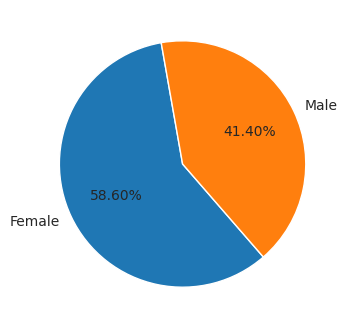

In [ ]:
# treating the gender column
# df.gender.value_counts()
df = df[df['gender']!= 'Other']
x = df.gender.value_counts()
plt.figure(figsize=(4,4))
plt.pie(x, labels=x.index, autopct='%1.2f%%', startangle=100)
plt.show()

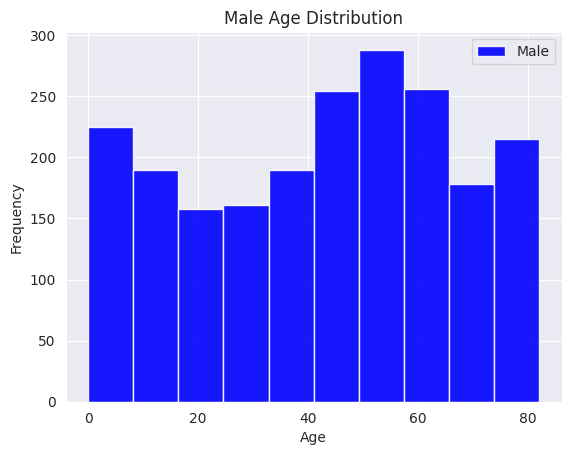

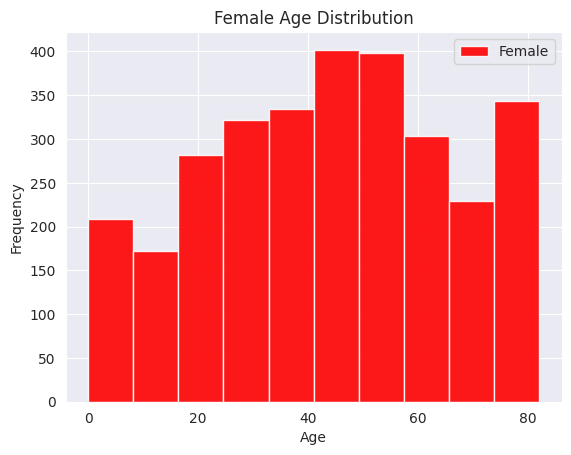

In [ ]:
# insights from age attribute

plt.figure()
plt.hist(df[df['gender'] == 'Male']['age'], bins=10, alpha=0.9, label='Male',color='blue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.title('Male Age Distribution')

plt.show()

plt.figure()
plt.hist(df[df['gender'] == 'Female']['age'], bins=10, alpha=0.9, label='Female',color='red')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.title('Female Age Distribution')

plt.show()

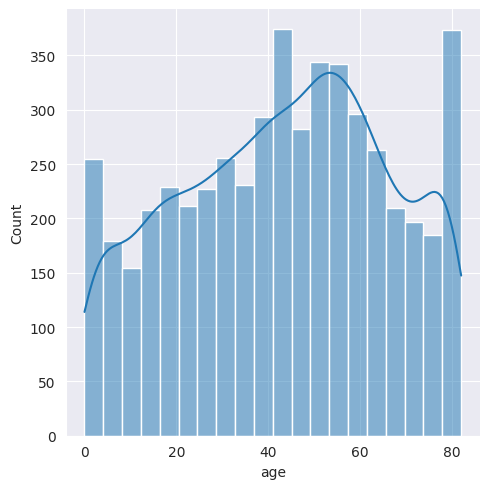

In [ ]:
sns.displot(df['age'], kde =True) #normal

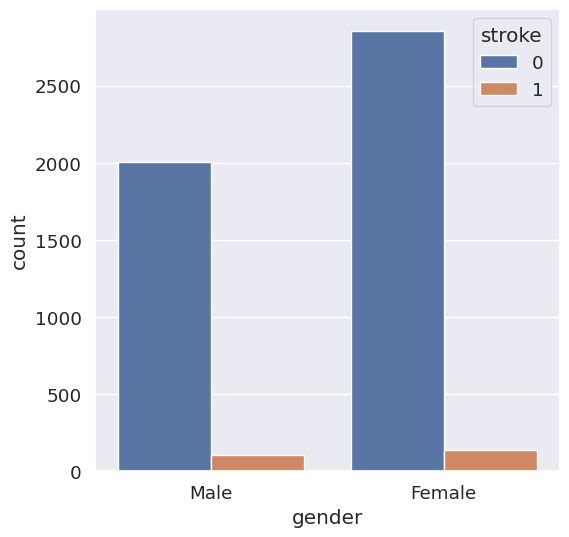

In [ ]:
# hypertenison against gender
sns.set(rc={'figure.figsize':(6,6)})
sns.set(font_scale=1.2)
sns.countplot(data=df,x='gender',hue=df.stroke)
plt.show()

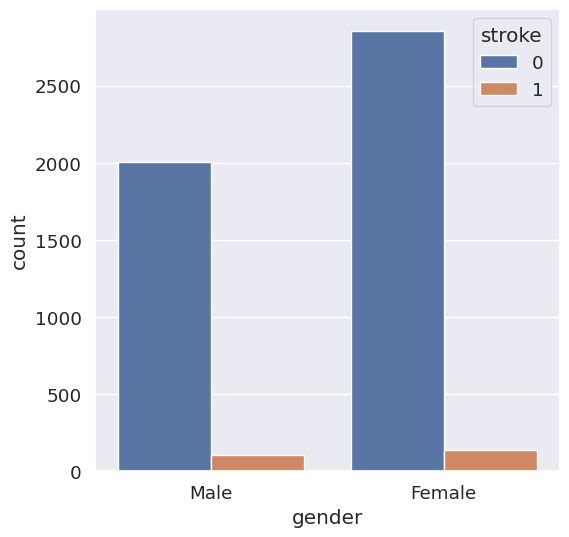

In [ ]:
# heart disease against gender
sns.set(rc={'figure.figsize':(6,6)})
sns.set(font_scale=1.2)
sns.countplot(data=df,x='gender',hue=df.stroke)
plt.show()

In [ ]:
# # let us check the gender corresponding heart disease
# pd.crosstab(df.gender, df.heart_disease)

In [ ]:
# dealing with gender

df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0, 'Other':2})

[1 0]
1    3353
0    1756
Name: ever_married, dtype: int64


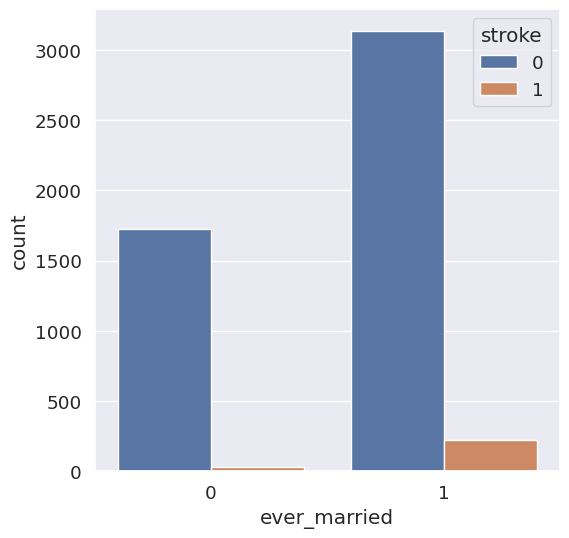

In [ ]:
# marital status against stroke
df['ever_married'] = df['ever_married'].replace({'Yes': 1, 'No': 0})
print(df['ever_married'].unique())
print(df['ever_married'].value_counts(dropna=False))

sns.countplot(x="ever_married", hue="stroke", data=df)
plt.show()

['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


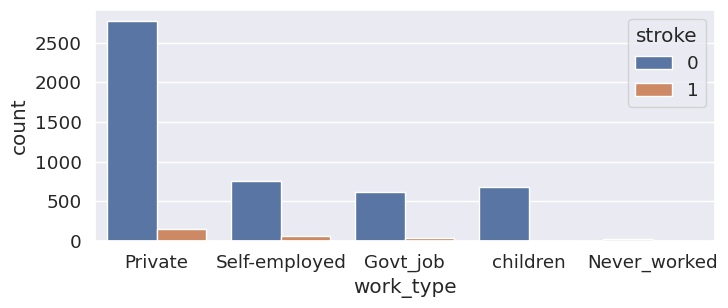

In [ ]:
# employement status against stroke
print(df['work_type'].unique())
print(df['work_type'].value_counts(dropna=False))

plt.figure(figsize=(8, 3))
sns.countplot(x="work_type", hue="stroke", data=df)
plt.show()

['Urban' 'Rural']
Urban    2596
Rural    2513
Name: Residence_type, dtype: int64


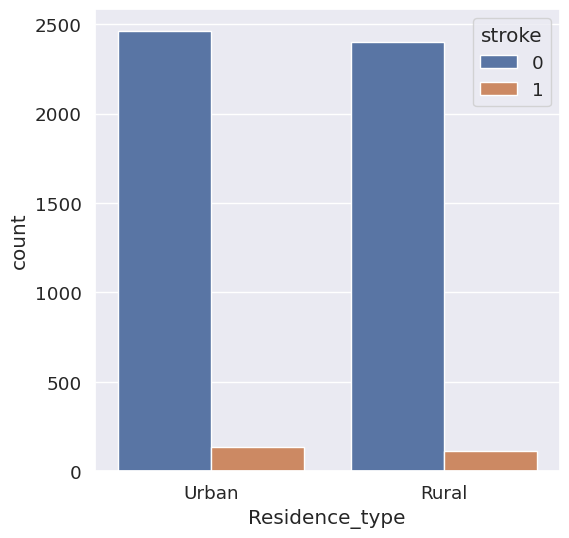

In [ ]:
# residencial status against stroke
print(df['Residence_type'].unique())
print(df['Residence_type'].value_counts(dropna=False))

sns.countplot(x="Residence_type", hue="stroke", data=df)
plt.show()

In [ ]:
# from the analysis we can drop the three columns
df.drop(["ever_married", "work_type", "Residence_type"], axis=1, inplace=True)


In [ ]:
# dealing with smoking status
df['smoking_status'] = df['smoking_status'].replace({'formerly smoked': 2, 'never smoked': 0, 'smokes': 1, 'Unknown': -1})
# print(df['smoking_status'].unique())

In [ ]:
df.head(3)

,gender,age,hypertension,heart_disease,avg_glucose_level,smoking_status,stroke
0,1,67,0,1,228.69,2,1
1,0,61,0,0,202.21,0,1
2,1,80,0,1,105.92,0,1


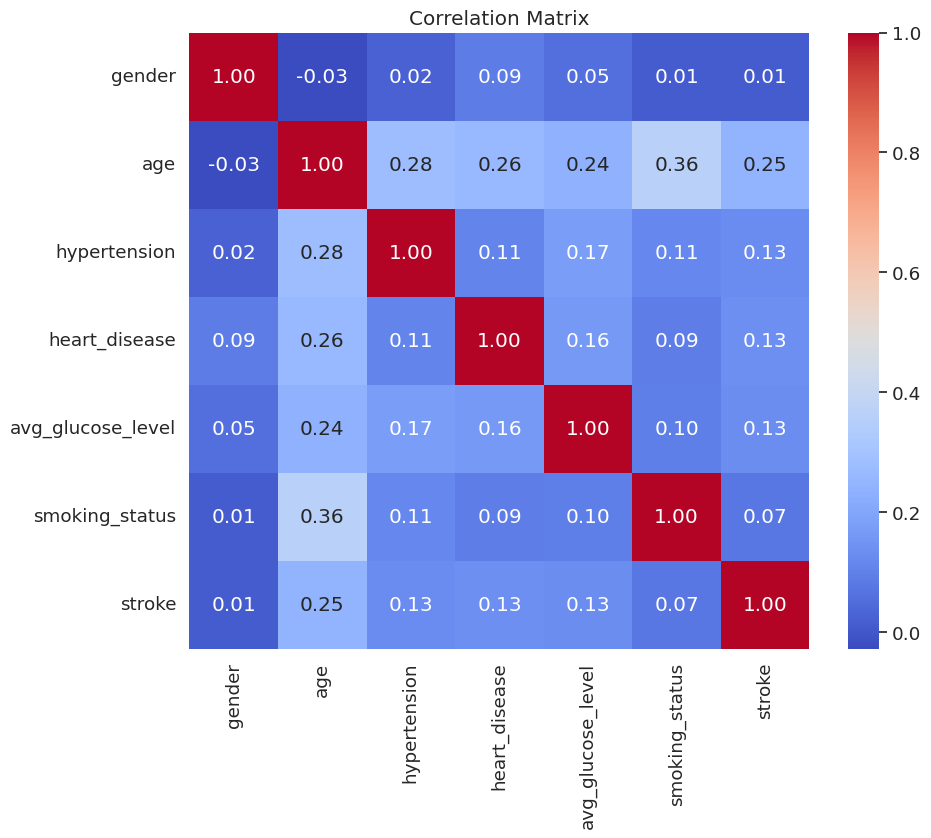

In [ ]:
# Lets get a correlation matrix

matrice_corr = df.corr()

# Creating a heat map for each
plt.figure(figsize=(10, 8))
sns.heatmap(matrice_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# now let us remove the target from our data frame
y = df.stroke
x = df.drop(columns='stroke')

**Model** **Training**

SVM model


In [ ]:
# train - test - split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)


In [ ]:
# let us create a SVM classifier
model= SVC(kernel = 'linear', random_state = 0)

model.fit(x_train, y_train)

# Predict the model fit
predictions = model.predict(x_test)

# evaluate the precision of the model
accuracy = accuracy_score(y_test, predictions)
print("Precision of SVM model:", accuracy)

Precision of SVM model: 0.94679186228482


In [ ]:
# metrics of the SVM model
classification_rep_svm = classification_report(y_test, predictions)
print(classification_rep_svm)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1210
           1       0.00      0.00      0.00        68

    accuracy                           0.95      1278
   macro avg       0.47      0.50      0.49      1278
weighted avg       0.90      0.95      0.92      1278



KNN model

In [ ]:
# let us train a KNN classifer model
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)


In [ ]:
# accuaracy of the knn model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# metrics report of the model
print(classification_report(y_test, y_pred))

Accuracy: 0.9381846635367762
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1210
           1       0.00      0.00      0.00        68

    accuracy                           0.94      1278
   macro avg       0.47      0.50      0.48      1278
weighted avg       0.90      0.94      0.92      1278



Logistic Regression Model

In [ ]:
# training a logistic regression model
model = LogisticRegression()

model.fit(x_train, y_train)

# predictions from the fitted model
predictions = model.predict(x_test)

In [ ]:
# accuaracy of the knn model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# metrics report of the model
print(classification_report(y_test, y_pred))

Accuracy: 0.94679186228482
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1210
           1       0.00      0.00      0.00        68

    accuracy                           0.94      1278
   macro avg       0.47      0.50      0.48      1278
weighted avg       0.90      0.94      0.92      1278

